# Demo:  Non-Parametric Estimation on Synthetic Data

We demonstrate some simple estimation methods on synthetic data.

## 1D Example

First, let's create some 1D data with a 

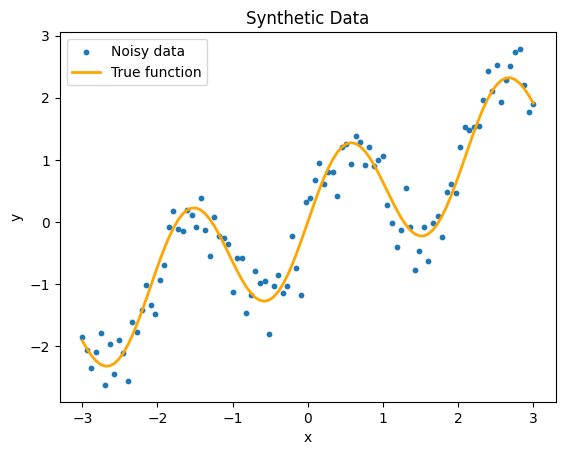

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# True function
def f(x):
    return np.sin(3 * x) + 0.5 * x

    

# Generate synthetic data
n = 100
X = np.linspace(-3, 3, n).reshape(-1, 1)
y = f(X) + 0.3 * np.random.randn(n, 1) 
plt.scatter(X, y, s=10, label='Noisy data')
plt.plot(X, f(X), color='orange', label='True function', lw=2)   
plt.legend()
plt.xlabel('x')
plt.ylabel('y')
plt.title('Synthetic Data')
plt.show()

To illustrate K-NN visually, let's just create some data with a very small number of points.

Text(0.5, 1.0, 'K-NN Regression')

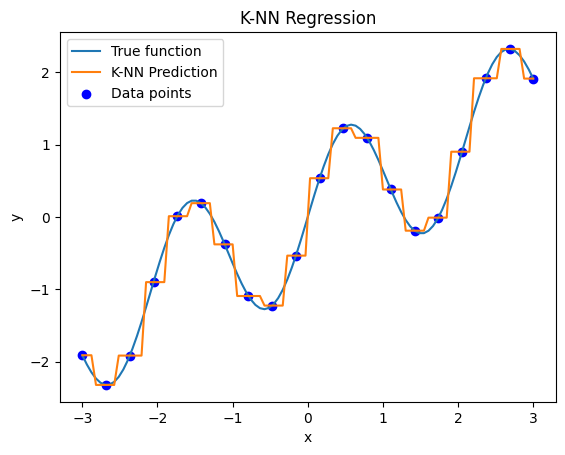

In [ ]:
xmin = -3
xmax = 3
xdata = np.linspace(xmin, xmax, 20)
ydata  = f(xdata)

xplot = np.linspace(xmin, xmax, 100).reshape(-1, 1)
yplot = f(xplot)

model = KNeighborsRegressor(n_neighbors=1)
model.fit(xdata.reshape(-1, 1), ydata)
yhat = model.predict(xplot)


plt.plot(xplot, yplot, label='True function')
plt.plot(xplot, yhat, label='K-NN Prediction')
plt.scatter(xdata, ydata, c='blue', label='Data points')
plt.legend()
plt.xlabel('x')
plt.ylabel('y')
plt.title('K-NN Regression')

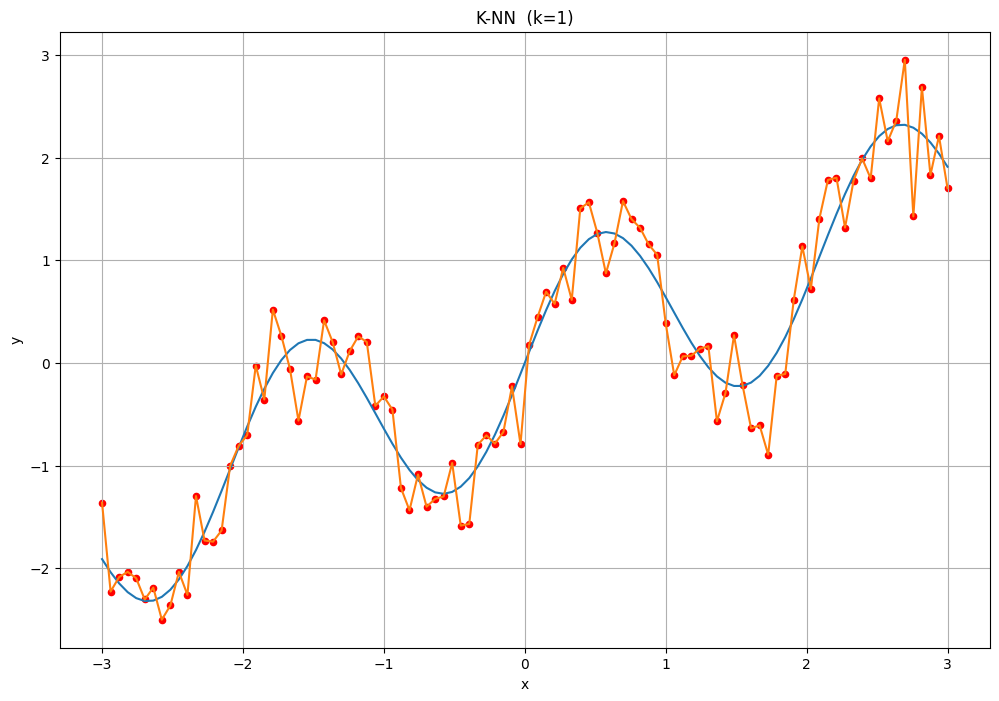

In [ ]:
ndata = 100
xdata = np.linspace(xmin, xmax, ndata)
ydata  = f(xdata) + 0.3 * np.random.randn(ndata)
ktest = [1, 3, 5, 10]
nk = len(ktest)

xplot = np.linspace(xmin, xmax, 100).reshape(-1, 1)
yplot = f(xplot)

plt.subplots(1, nk, figsize=(12, 8))
for i, k in enumerate(ktest):
    plt.subplot(1, nk, i+1)
    model = KNeighborsRegressor(n_neighbors=k)
    model.fit(xdata.reshape(-1, 1), ydata)
    yhat = model.predict(xplot)

    plt.plot(xplot, yplot, label='True')
    plt.plot(xplot, yhat, label='K-NN')
    if nk==1:
        s = 10
    else:
        s = 2
    plt.scatter(xdata, ydata, c='red', label='Data points', s=20)
    plt.grid()
    #plt.legend()
    plt.xlabel('x')
    plt.ylabel('y')
    plt.title(f'K-NN  (k={k})')


Let's also create some 2D data


[0.426645710385396, 0.2034292524770982, 0.1635385976627748, 0.3476933938454703]


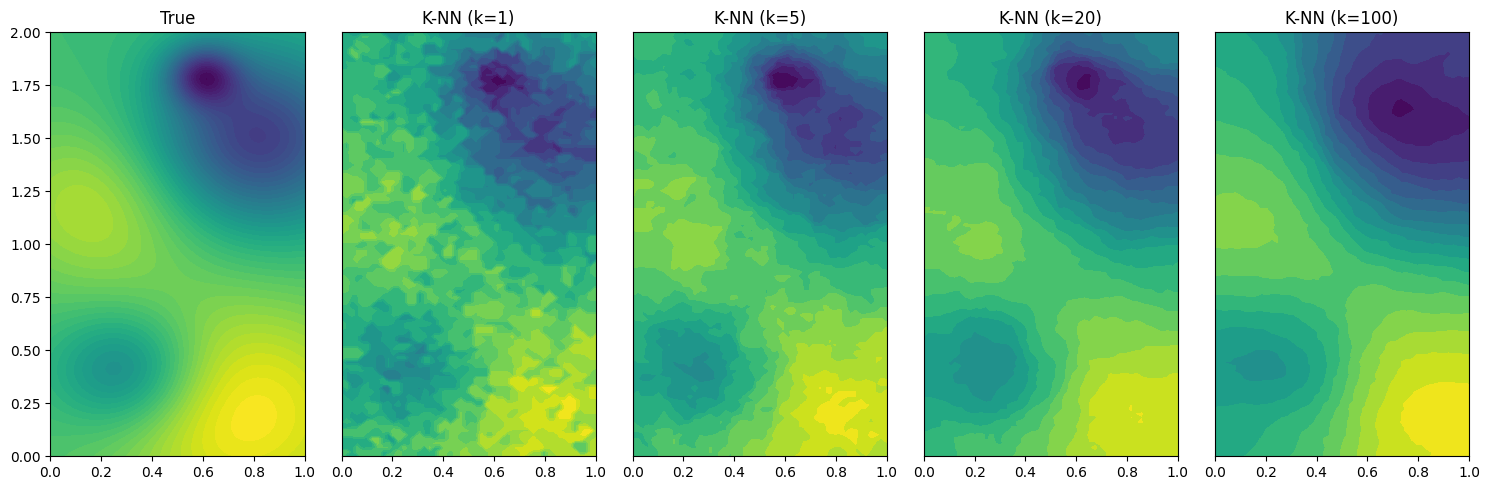

In [83]:
bndbox = np.array([1,2.0])
xplot0 = np.linspace(0, bndbox[0], 50)
xplot1 = np.linspace(0, bndbox[1], 100)
xplot0_grid, xplot1_grid = np.meshgrid(xplot0, xplot1)
plt_data = False
ktest = [1, 5, 20, 100]
nk = len(ktest)
sig = 0.5

# Generate random centers
muc = np.array([[0.2, 1.2], [0.3, 0.4], [0.75, 0.2], [0.6, 1.8],  [0.8, 1.5]])
radc = np.array([0.3, 0.2, 0.4, 0.1, 0.3])
zc = np.array([2.0, -3.0, 3.0, -4, -5.0])

# Synthetic function
def f2(X):
    n = X.shape[0]
    z = np.zeros(n)
    x0 = X[:, 0]
    x1 = X[:, 1]
    for mu, rad, zi in zip(muc, radc, zc):
        dist_sq = (x0 - mu[0])**2 + (x1 - mu[1])**2
        z += zi * np.exp(-dist_sq / (2 * rad**2))
    return z



# Generate random data points
npoints = 1000

xdata2 = np.random.rand(npoints, 2)*bndbox[None,:]
ydata2 = f2(xdata2)  + sig * np.random.randn(npoints)

# Plot true function and K-NN predictions
plt.figure(figsize=(15, 5))
nsub = nk + 1
plt.subplot(1, nsub, 1)
xplot_flat = np.column_stack((xplot0_grid.ravel(), xplot1_grid.ravel()))
zplot = f2(xplot_flat).reshape(xplot0_grid.shape)
plt.contourf(xplot0_grid, xplot1_grid, zplot, levels=50, cmap='viridis')
plt.title('True')


# Train K-NN model
errors = []
for i, k in enumerate(ktest):
    model2 = KNeighborsRegressor(n_neighbors=k)
    model2.fit(xdata2, ydata2)
    yhat2 = model2.predict(xplot_flat).reshape(xplot0_grid.shape)  


    err = np.mean(np.abs(yhat2 - zplot))
    errors.append(err)
    plt.subplot(1, nsub, i+2)
    plt.contourf(xplot0_grid, xplot1_grid, yhat2, levels=20, cmap='viridis')
    if plt_data:
        plt.scatter(xdata2[:, 0], xdata2[:, 1], c='white', edgecolor='black', s=50, label='Data points')
    plt.yticks([])
    plt.tight_layout()

    plt.title(f'K-NN (k={k})')

print(errors)

#plt.scatter(muc[:, 0], muc[:, 1], c='red', marker='x', s=100, label='Centers')




k=1, MAE=0.638
k=6, MAE=0.427
k=11, MAE=0.416
k=16, MAE=0.420
k=21, MAE=0.420
k=27, MAE=0.417
k=32, MAE=0.422
k=37, MAE=0.439
k=42, MAE=0.453
k=47, MAE=0.459
k=53, MAE=0.472
k=58, MAE=0.477
k=63, MAE=0.485
k=68, MAE=0.488
k=73, MAE=0.491
k=79, MAE=0.503
k=84, MAE=0.507
k=89, MAE=0.516
k=94, MAE=0.529
k=100, MAE=0.541


Text(0, 0.5, 'Mean Absolute Error (MAE)')

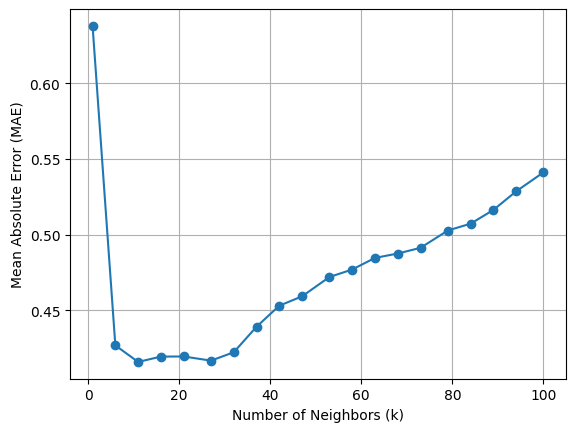

In [ ]:
xtrain, xtest, ytrain, ytest = train_test_split(xdata2, ydata2, test_size=0.2, random_state=42) 
ktest = np.linspace(1, 100, 20).astype(int)

mae = []
for i, k in enumerate(ktest):
    model = KNeighborsRegressor(n_neighbors=k)
    model.fit(xtrain, ytrain)
    yhat = model.predict(xtest)
    err = np.mean(np.abs(yhat - ytest))
    mae.append(err)
    print(f'k={k}, MAE={err:.3f}')

plt.plot(ktest, mae, marker='o')
plt.grid()
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Mean Absolute Error (MAE)')


First, let's visualize some K-NN plots.  

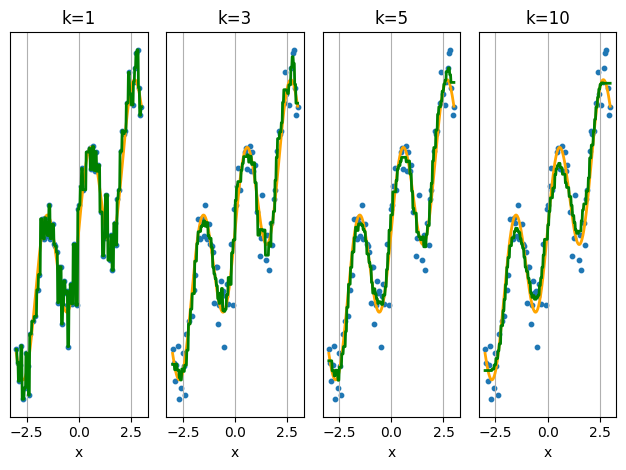

In [18]:
ktest = [1, 3, 5, 10]
nk = len(ktest)

from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)


# Data for plotting
xplot = np.linspace(-3, 3, 300).reshape(-1, 1)
nplot = len(xplot)
yest_plot = np.zeros((nplot, nk))

test_errors = []


for i, k in enumerate(ktest):

    # Fit the model
    model = KNeighborsRegressor(n_neighbors=k)
    model.fit(X_train, y_train)

    # Prediction for plotting
    yest_plot[:, i] = model.predict(xplot).ravel()

    # Evaluate on test set
    y_pred = model.predict(X_test)
    test_mae = mean_absolute_error(y_test, y_pred)
    test_errors.append(test_mae)

    plt.subplot(1, nk, i + 1)

    # Plot results
    plt.plot(xplot, f(xplot), color='orange', lw=2, label='True function')
    plt.scatter(X_train, y_train, s=10, label='Train data')
    plt.plot(xplot, yest_plot[:,i], color='green', lw=2)
    plt.title(f'k={k}')
    plt.yticks([])
    plt.xlabel('x')
    plt.grid()
    #plt.ylabel('y')
    #plt.legend()
plt.tight_layout()
plt.show()

## Kernel Smoother

We now look at a kernel smoother

In [123]:
def kernel_smoother(xdata, ydata, x, sig, tol=1e-8):
    Dsq = np.sum((xdata[None,:,:] - x[:,None,:])**2, axis=2)
    K = np.exp(-0.5 * Dsq/(sig**2))
    Ksum = K.sum(axis=1, keepdims=True)
    W = K / (Ksum + tol)
    yhat = (W * ydata[None,:]).sum(axis=1)
    return yhat


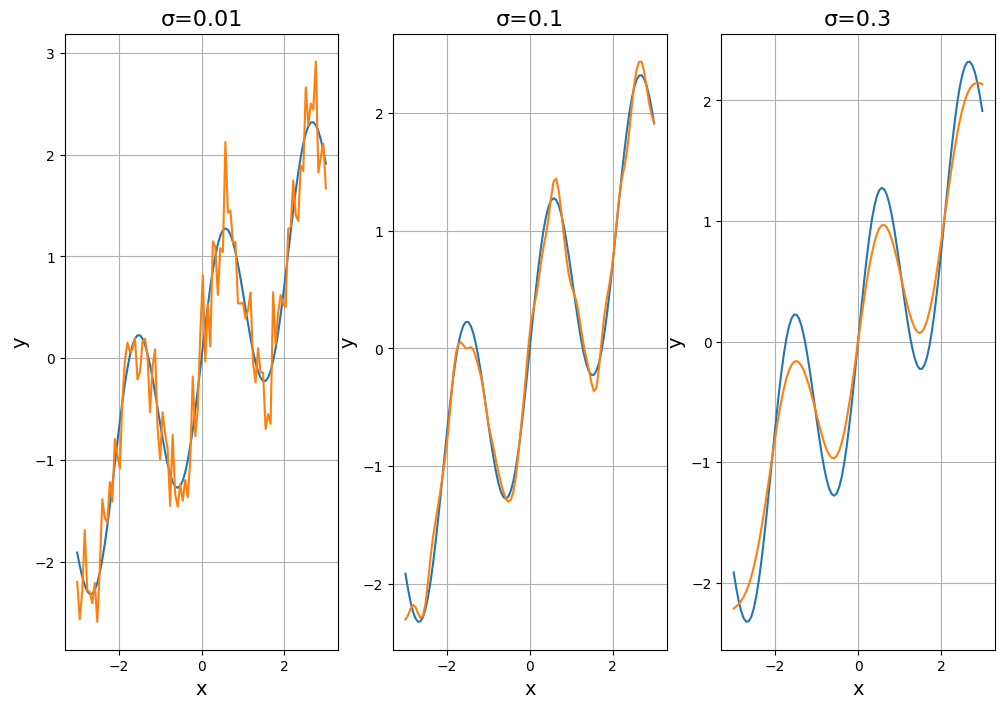

In [124]:
ndata = 100
xdata = np.linspace(xmin, xmax, ndata)
ydata  = f(xdata) + 0.3 * np.random.randn(ndata)
sig_test = [0.01, 0.1, 0.3]
nk = len(sig_test)

xplot = np.linspace(xmin, xmax, 100)
yplot = f(xplot)

plt.subplots(1, nk, figsize=(12, 8))
for i, sig in enumerate(sig_test):
    plt.subplot(1, nk, i+1)

    yhat = kernel_smoother(xdata[:,None], ydata, xplot[:,None], sig)

    plt.plot(xplot, yplot, label='True')
    plt.plot(xplot, yhat, label='KS')
    if nk==1:
        s = 10
    else:
        s = 2
    #plt.scatter(xdata, ydata, c='red', label='Data points', s=20)
    plt.grid()
    #plt.legend()
    plt.xlabel('x', fontsize=14)
    plt.ylabel('y', fontsize=14)
    plt.title(f'σ={sig}', fontsize=16)

In [115]:
xplot.shape

(100, 1)